In [1]:
pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# **Data Exploration and Preprocessing**

In [3]:
data = pd.read_csv('/content/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29799 entries, 0 to 29798
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    29799 non-null  int64  
 1   V1      29799 non-null  float64
 2   V2      29799 non-null  float64
 3   V3      29799 non-null  float64
 4   V4      29799 non-null  float64
 5   V5      29799 non-null  float64
 6   V6      29798 non-null  float64
 7   V7      29798 non-null  float64
 8   V8      29798 non-null  float64
 9   V9      29798 non-null  float64
 10  V10     29798 non-null  float64
 11  V11     29798 non-null  float64
 12  V12     29798 non-null  float64
 13  V13     29798 non-null  float64
 14  V14     29798 non-null  float64
 15  V15     29798 non-null  float64
 16  V16     29798 non-null  float64
 17  V17     29798 non-null  float64
 18  V18     29798 non-null  float64
 19  V19     29798 non-null  float64
 20  V20     29798 non-null  float64
 21  V21     29798 non-null  float64
 22

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,29799.000000,29799.000000,29799.000000,29799.000000,29799.000000,29799.000000,29798.000000,29798.000000,29798.000000,29798.000000,...,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000,29798.000000
mean,21415.425719,-0.209312,0.125470,0.720538,0.213023,-0.203808,0.089008,-0.121495,0.030902,0.351012,...,-0.033872,-0.123746,-0.041956,0.009204,0.132632,0.022783,0.012362,0.004780,79.620566,0.003155
std,12038.537147,1.845781,1.543515,1.613657,1.418989,1.419221,1.321267,1.291495,1.287706,1.257026,...,0.786840,0.640527,0.540717,0.591995,0.435684,0.511026,0.388416,0.273684,222.110430,0.056078
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10122.000000,-0.951024,-0.446725,0.261163,-0.697463,-0.798822,-0.653976,-0.595929,-0.160211,-0.456677,...,-0.244970,-0.546113,-0.176410,-0.327428,-0.129629,-0.334686,-0.063502,-0.007942,6.540000,0.000000
50%,26182.000000,-0.249361,0.149599,0.844654,0.197721,-0.237290,-0.171222,-0.068568,0.035759,0.244841,...,-0.090713,-0.096810,-0.050365,0.062233,0.172286,-0.057223,0.008246,0.020445,20.000000,0.000000
75%,32195.000000,1.165752,0.788149,1.473903,1.096170,0.312701,0.475508,0.444292,0.294166,1.106549,...,0.083442,0.285024,0.075052,0.398687,0.415022,0.303728,0.089536,0.076514,70.750000,0.000000
max,35634.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [7]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [8]:
data.fillna(data.mean(), inplace=True)

In [9]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
data.duplicated().sum()

121

In [11]:
data.drop_duplicates(inplace=True)

# **Exploratory Data Analysis - EDA**

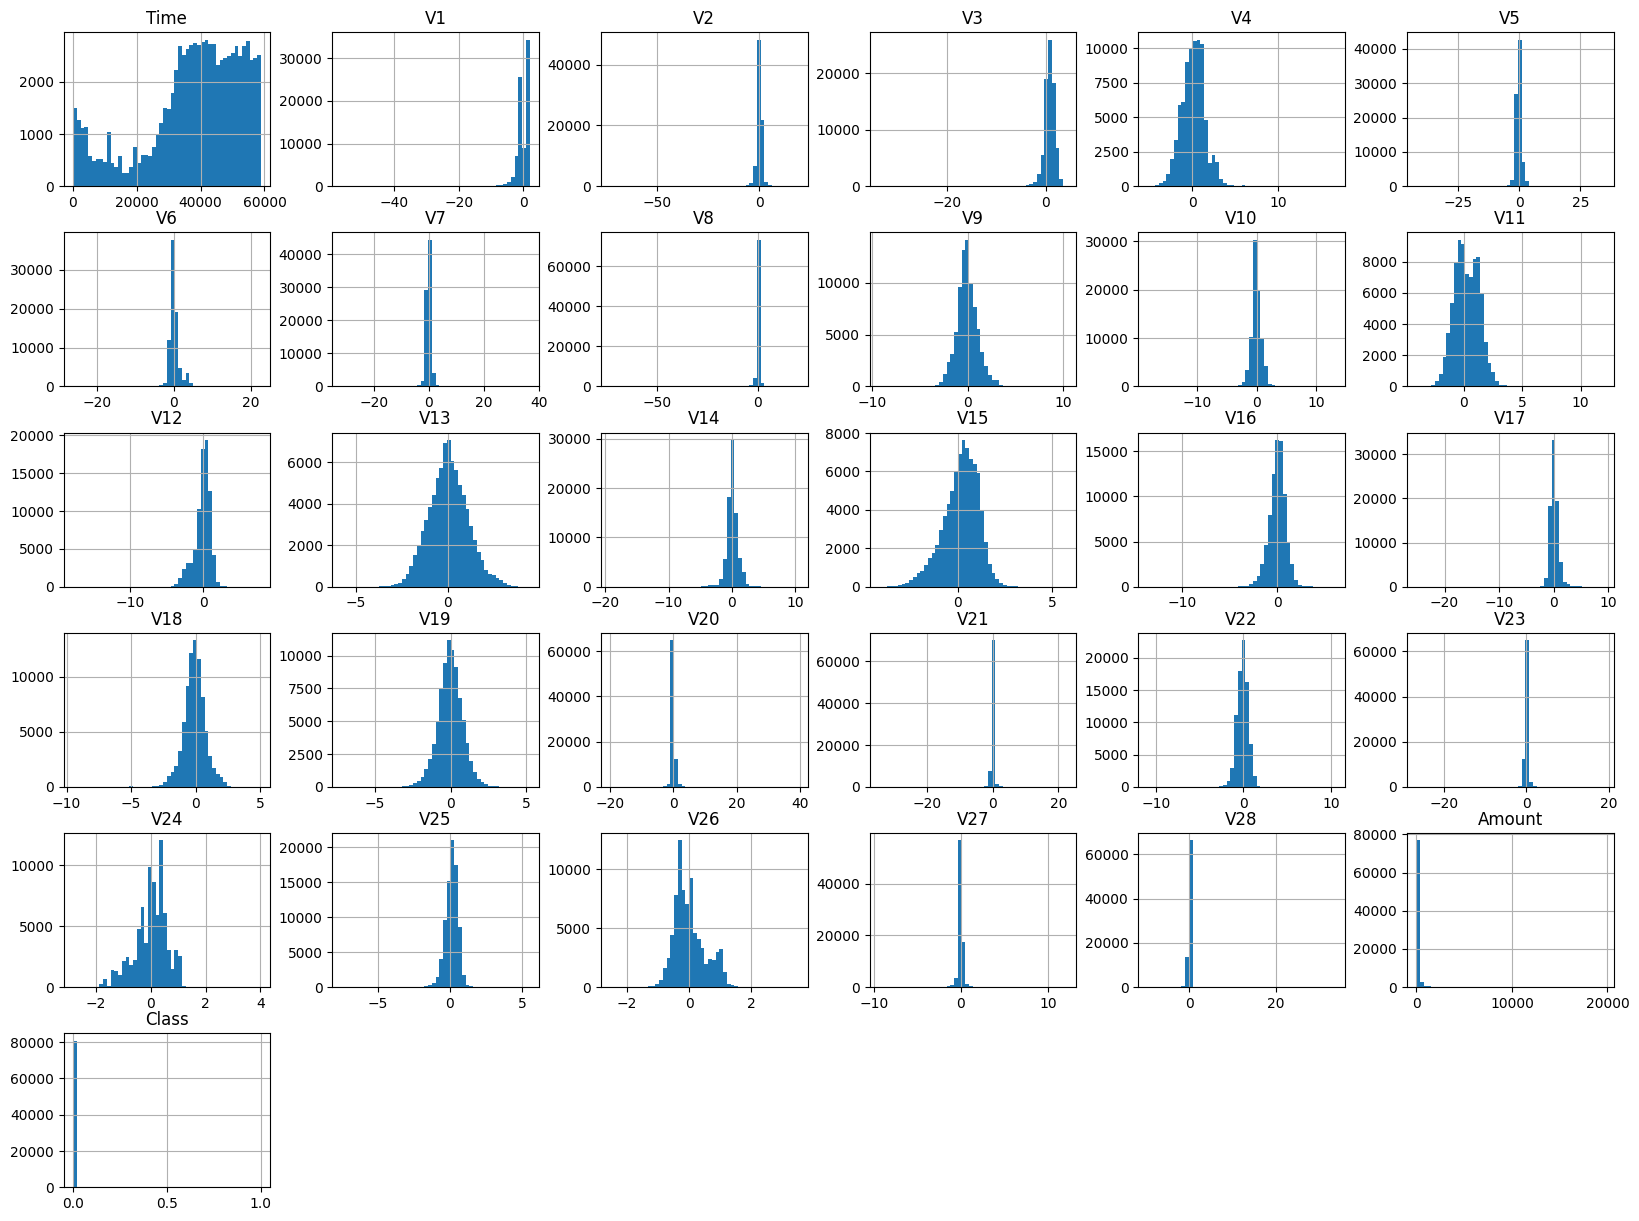

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

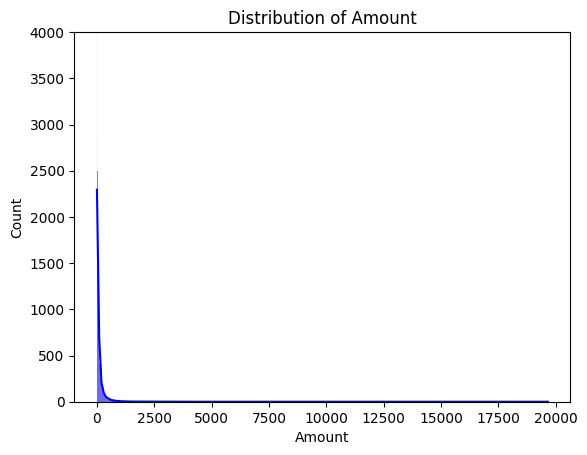

In [ ]:
sns.histplot(data['Amount'], kde=True, color='blue')
plt.title('Distribution of Amount')
plt.ylim(0, 2500)
plt.show()

*Boxplots*

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


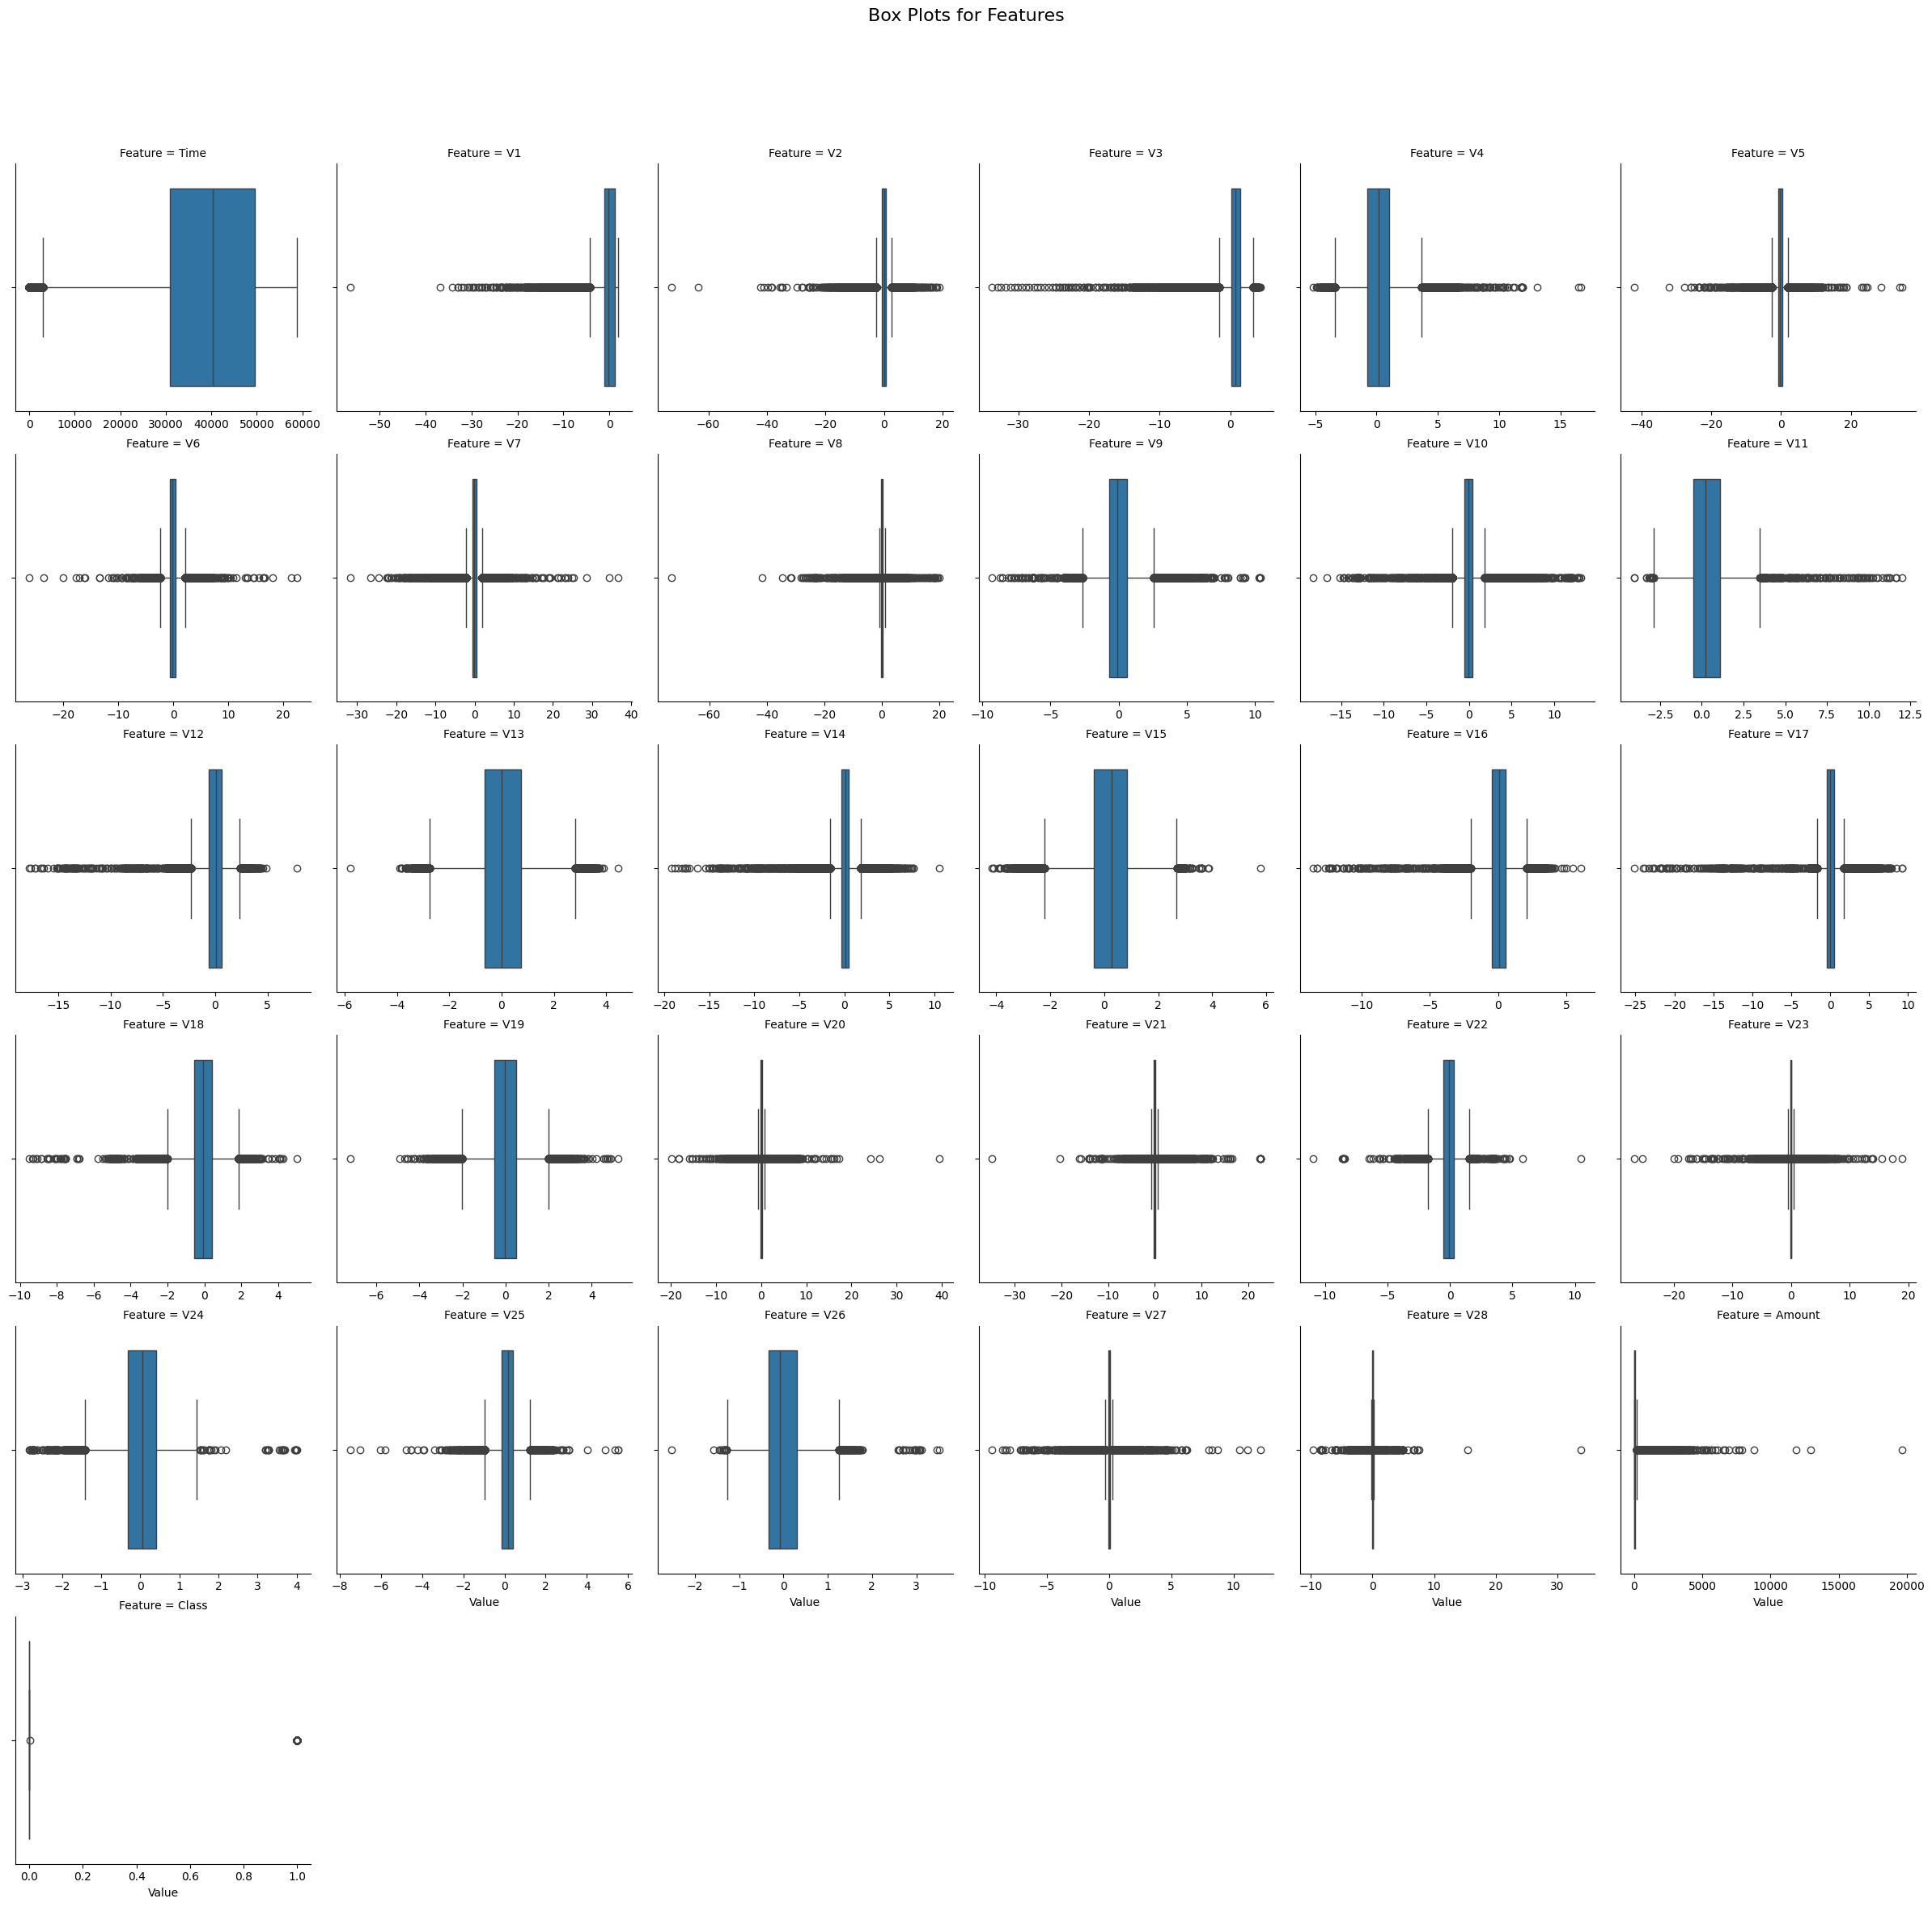

In [ ]:
col = data.columns
melted_data = data[col].melt(var_name='Feature', value_name='Value')
graph= sns.FacetGrid(melted_data, col="Feature", col_wrap=6, height=4, sharex=False, sharey=False)
graph.map(sns.boxplot, "Value")
graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle("Box Plots for Features", fontsize=16)
plt.show()

*Scatter Plot*

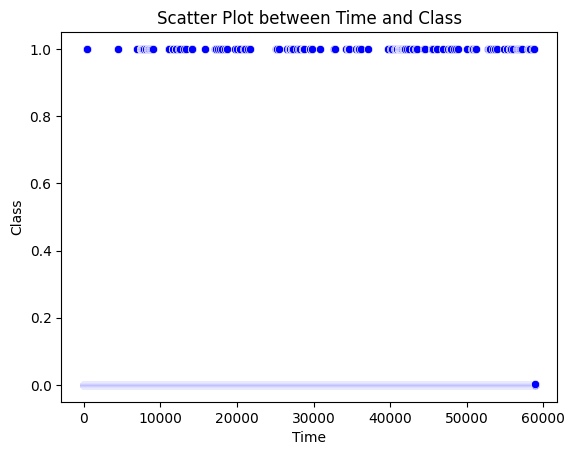

In [ ]:
sns.scatterplot(x=data['Time'], y=data['Class'], color='blue')
plt.title("Scatter Plot between Time and Class")
plt.xlabel("Time")
plt.ylabel("Class")
plt.show()

*Analyze the relationship between properties and Class*

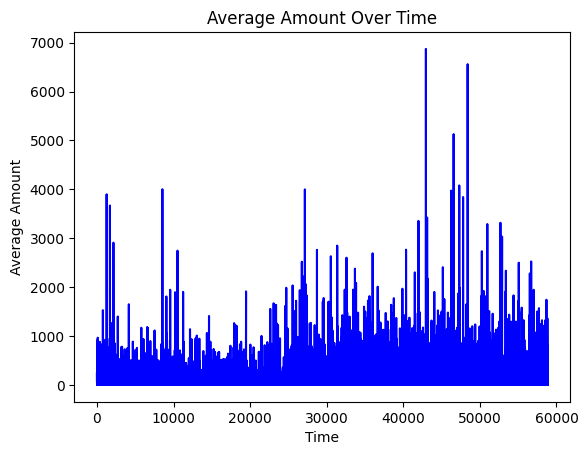

In [ ]:
data_grouped = data.groupby('Time')['Amount'].mean().reset_index()
sns.lineplot(x=data_grouped['Time'], y=data_grouped['Amount'], color='blue')
plt.title("Average Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Average Amount")
plt.show()


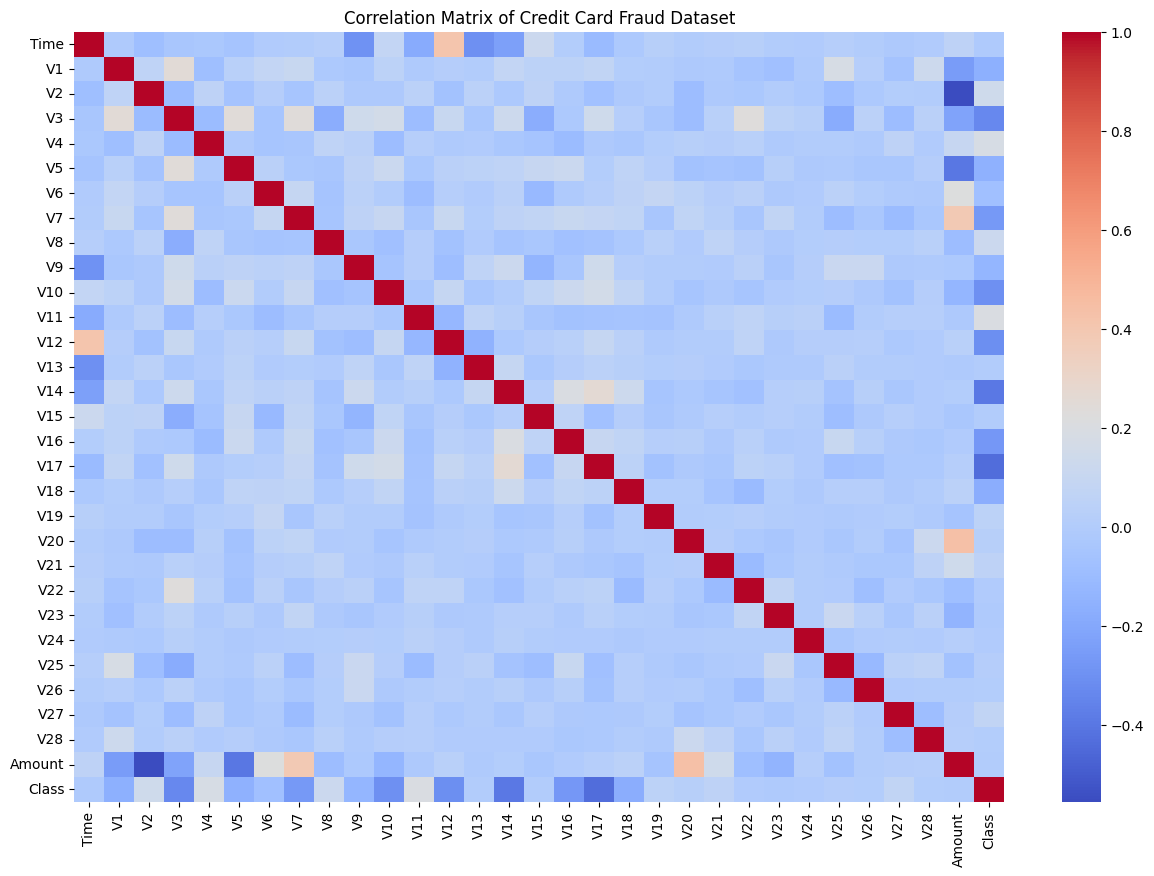

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Credit Card Fraud Dataset")
plt.show()

*Add new features*


*Calculate the normalization of amounts*

In [12]:
data['Normalized_Amount'] = data['Amount'] / data['Amount'].max()

*Calculate categories of amounts, such as Small, Medium, and Large*

In [13]:
bins = [0, 50, 200, 20000]
labels = ['Small', 'Medium', 'Large']
data['Amount_Bucket'] = pd.cut(data['Amount'], bins=bins, labels=labels)

*Calculate the interaction between Amount and Class*

In [14]:
data['Amount_Class'] = data['Amount'] * data['Class']

# **Implementation**

In [15]:
data['Class'] = data['Class'].astype(int)

In [16]:
x = data[['Amount', 'Time']]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

*Smote*

In [17]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled .value_counts())

Before SMOTE: Class
0    23664
1       78
Name: count, dtype: int64
After SMOTE: Class
0    23664
1    23664
Name: count, dtype: int64


In [ ]:
for column in data.select_dtypes(include=np.number).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# **Model Implementation**

*KNN Model*

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_resampled, y_train_resampled)


KNeighborsClassifier(n_neighbors=15)

In [20]:
y_pred = knn_model.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [22]:
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8482142857142857
F1 Score: 0.021715526601520086
Recall: 0.625
ROC AUC Score: 0.7369087837837838


*Logistic Regression Model*

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [24]:
y_pred_log = log_reg.predict(X_test)

In [25]:
accuracy_logistic = accuracy_score(y_test, y_pred_log )
precision_logistic  = precision_score(y_test, y_pred_log )
recall_logistic  = recall_score(y_test, y_pred_log )
f1_logistic  = f1_score(y_test, y_pred_log )
roc_auc_logistic = roc_auc_score(y_test, y_pred_log )

In [26]:
print(f"Logistic Regression Accuracy: {accuracy_logistic }")
print(f"Logistic Regression Precision: {precision_logistic }")
print(f"Logistic Regression Recall: {recall_logistic }")
print(f"Logistic Regression F1 Score: {f1_logistic }")
print(f"Logistic Regression ROC AUC Score: {roc_auc_logistic}")

Logistic Regression Accuracy: 0.6095013477088949
Logistic Regression Precision: 0.0030224525043177895
Logistic Regression Recall: 0.4375
Logistic Regression F1 Score: 0.006003430531732418
Logistic Regression ROC AUC Score: 0.5237331081081081


In [27]:
results = []

results.append({
    "Model": "K-Nearest Neighbors ",
    "Accuracy": acc,
    "roc_auc": roc_auc,
    "Recall": recall,
    "F1-Score": f1,

})

results.append({
    "Model": "Logistic Regression",

    "Accuracy": accuracy_logistic,
    "Precision": precision_logistic,
    "Recall": recall_logistic,
    "F1-Score": f1_logistic,
    "roc_auc": roc_auc_logistic,
})

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,roc_auc,Recall,F1-Score,Precision
0,K-Nearest Neighbors,0.848214,0.736909,0.6250,0.021716,NaN
1,Logistic Regression,0.609501,0.523733,0.4375,0.006003,0.003022


*Compare the performance of different models and select the best-performing one.*

In [28]:
best_classification_model = results_df[results_df["Accuracy"] != "NaN"].sort_values("F1-Score", ascending=False).iloc[0]
print("Best Classification Model:")
print(best_classification_model)

Best Classification Model:
Model        K-Nearest Neighbors 
Accuracy                 0.848214
roc_auc                  0.736909
Recall                      0.625
F1-Score                 0.021716
Precision                     NaN
Name: 0, dtype: object
